In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_rows = 999

In [2]:
accre_jobs = pd.read_csv('../data/accre-jobs-2020.csv', nrows=2)

In [3]:
columns_list= accre_jobs.columns.to_list()
columns_list

['JOBID',
 'ACCOUNT',
 'USER',
 'REQMEM',
 'USEDMEM',
 'REQTIME',
 'USEDTIME',
 'NODES',
 'CPUS',
 'PARTITION',
 'EXITCODE',
 'STATE',
 'NODELIST']

In [4]:
accre_jobs

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441


In [5]:
accre_jobs = pd.read_csv('../data/accre-jobs-2020.csv', nrows=2, usecols=columns_list)

In [6]:
accre_jobs = pd.read_csv('../data/accre-jobs-2020.csv', nrows=3500, usecols=columns_list)

In [7]:
accre_jobs.loc[3460:3470]

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
3460,17050901_91,winged,lavonda,4096Mn,669.61M,12:00:00,00:06:05,4,1,production,0:0,COMPLETED,cn[449
3461,17050901_92,winged,lavonda,4096Mn,500.06M,12:00:00,00:02:25,1,4,production,0:0,COMPLETED,cn1336
3462,17050901_93,winged,lavonda,4096Mn,530.52M,12:00:00,00:02:19,1,4,production,0:0,COMPLETED,cn1319
3463,17050901_94,winged,lavonda,4096Mn,620.31M,12:00:00,00:05:59,3,1,production,0:0,COMPLETED,cn[425
3464,17050901_95,winged,lavonda,4096Mn,484.49M,12:00:00,00:02:08,1,4,production,0:0,COMPLETED,cn1319
3465,17050901_96,winged,lavonda,4096Mn,304.21M,12:00:00,00:02:16,1,4,production,0:0,COMPLETED,cn1336
3466,17050901_97,winged,lavonda,4096Mn,629.38M,12:00:00,00:06:24,4,1,production,0:0,COMPLETED,cn[394
3467,17050901_98,winged,lavonda,4096Mn,561.52M,12:00:00,00:02:04,1,4,production,0:0,COMPLETED,cn1319
3468,17050901_99,winged,lavonda,4096Mn,636.64M,12:00:00,00:02:00,1,4,production,0:0,COMPLETED,cn1319
3469,17050901_100,winged,lavonda,4096Mn,522.07M,12:00:00,00:02:09,1,4,production,0:0,COMPLETED,cn1336


In [8]:
with open('../data/accre-jobs-2020-piped.csv', 'w') as out_file:
    with open('../data/accre-jobs-2020.csv') as in_file:
        for line in in_file.readlines():
            out_file.write(line.replace(',','|', 12))

In [9]:
accre_jobs_piped = pd.read_csv('../data/accre-jobs-2020-piped.csv', sep="|")

In [10]:
accre_jobs_piped.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [11]:
accre_jobs_piped.loc[3460:3470]

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
3460,17050901_91,winged,lavonda,4096Mn,669.61M,12:00:00,00:06:05,4,1,production,0:0,COMPLETED,"cn[449,463,911,913]"
3461,17050901_92,winged,lavonda,4096Mn,500.06M,12:00:00,00:02:25,1,4,production,0:0,COMPLETED,cn1336
3462,17050901_93,winged,lavonda,4096Mn,530.52M,12:00:00,00:02:19,1,4,production,0:0,COMPLETED,cn1319
3463,17050901_94,winged,lavonda,4096Mn,620.31M,12:00:00,00:05:59,3,1,production,0:0,COMPLETED,"cn[425,449,1134]"
3464,17050901_95,winged,lavonda,4096Mn,484.49M,12:00:00,00:02:08,1,4,production,0:0,COMPLETED,cn1319
3465,17050901_96,winged,lavonda,4096Mn,304.21M,12:00:00,00:02:16,1,4,production,0:0,COMPLETED,cn1336
3466,17050901_97,winged,lavonda,4096Mn,629.38M,12:00:00,00:06:24,4,1,production,0:0,COMPLETED,"cn[394,463,911,913]"
3467,17050901_98,winged,lavonda,4096Mn,561.52M,12:00:00,00:02:04,1,4,production,0:0,COMPLETED,cn1319
3468,17050901_99,winged,lavonda,4096Mn,636.64M,12:00:00,00:02:00,1,4,production,0:0,COMPLETED,cn1319
3469,17050901_100,winged,lavonda,4096Mn,522.07M,12:00:00,00:02:09,1,4,production,0:0,COMPLETED,cn1336


In [12]:
accre_jobs_piped.sort_values('USEDTIME', ascending=False)

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
1622427,19735157,mickey,penny,126976Mn,7541.80M,20-20:00:00,9-23:34:43,1,24,cgw-dougherty1,0:0,COMPLETED,dougherty1
461600,17713864_49,fresh,demonte,24576Mn,14165.00M,10-00:00:00,9-23:27:11,1,2,production,0:0,COMPLETED,cn316
3610224,23765382,boysenberries,hortensia,120000Mn,40152.81M,13-22:00:00,9-23:11:50,1,8,production,0:0,COMPLETED,cn1240
3610223,23765380,boysenberries,hortensia,120000Mn,39362.95M,13-22:00:00,9-23:11:36,1,8,production,0:0,COMPLETED,cn1237
2814590,22318738,lychees,elba,30720Mn,1349.73M,14-00:00:00,9-22:57:28,1,2,production,0:0,COMPLETED,cn414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761966,18105129,cms,cmspilot,62193Mn,0,2-00:00:00,00:00:00,1,12,nogpfs,0:0,COMPLETED,ng1113
2014499,20598113,cms,uscmslocal,46071Mn,0,2-00:00:00,00:00:00,1,8,nogpfs,0:0,COMPLETED,ng518
2014179,20596308,cmsadmin,lcgadmin,4096Mn,0.09M,2-00:00:00,00:00:00,1,1,sam,0:0,COMPLETED,vm-cms-sam-pri
652666,17985724,cms,cmslocal,21875Mn,0,2-00:00:00,00:00:00,1,8,nogpfs,0:0,COMPLETED,ng1027


In [13]:
accre_jobs_piped.columns = [col_name.lower() for col_name in accre_jobs_piped.columns]

In [14]:
accre_jobs_piped.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [15]:
def get_seconds(used_time_string):
    """calculate total second in job time"""
    days = 0
    day_break = used_time_string.split('-')
    if len(day_break) > 1:
        days = int(day_break[0])
        hms = day_break[1]
    else:
        hms = day_break[0]
    hours, mins, secs = [int(part) for part in hms.split(':')]
    total_seconds = secs + (mins * 60) + (hours * 3600) + (days * 86400)
    return total_seconds    

In [16]:
accre_jobs_piped['req_total_seconds'] = accre_jobs_piped['reqtime'].apply(get_seconds)

In [17]:
accre_jobs_piped.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,req_total_seconds
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188000
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1188000
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188000
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1188000
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188000


In [18]:
accre_jobs_piped['used_total_seconds'] = accre_jobs_piped['usedtime'].apply(get_seconds)

In [19]:
accre_jobs_piped.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,req_total_seconds,used_total_seconds
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188000,1188028
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1188000,1090256
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188000,1188020
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1188000,1050632
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188000,1188003


In [20]:
accre_jobs_piped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 0 to 3816289
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   jobid               object
 1   account             object
 2   user                object
 3   reqmem              object
 4   usedmem             object
 5   reqtime             object
 6   usedtime            object
 7   nodes               int64 
 8   cpus                int64 
 9   partition           object
 10  exitcode            object
 11  state               object
 12  nodelist            object
 13  req_total_seconds   int64 
 14  used_total_seconds  int64 
dtypes: int64(4), object(11)
memory usage: 436.7+ MB


In [21]:
def get_mb_per_core(row):
    if 'Mn' in row['reqmem']:
        cpus = row['cpus'] or 1
        reqmem = int(row['reqmem'][:-2]) / (row['nodes'] * cpus)
    elif 'Mc' in row['reqmem']:
        reqmem = int(row['reqmem'][:-2])
    else:
        reqmem = row['reqmem']
    return reqmem
        

In [22]:
accre_jobs_piped['mb_per_core'] = accre_jobs_piped.apply(get_mb_per_core, axis = 1)

In [23]:
accre_jobs_piped.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,req_total_seconds,used_total_seconds,mb_per_core
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188000,1188028,5120.0
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1188000,1090256,5120.0
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188000,1188020,5120.0
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1188000,1050632,5120.0
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188000,1188003,5120.0


In [24]:
accre_jobs_piped['nodelist'][3460:3470].to_list()

['cn[449,463,911,913]',
 'cn1336',
 'cn1319',
 'cn[425,449,1134]',
 'cn1319',
 'cn1336',
 'cn[394,463,911,913]',
 'cn1319',
 'cn1319',
 'cn1336']

In [25]:
accre_jobs_piped['nodelist'][3460:3470].str.findall(r'(\D+)*(\d+)')

3460    [(cn[, 449), (,, 463), (,, 911), (,, 913)]
3461                                  [(cn, 1336)]
3462                                  [(cn, 1319)]
3463             [(cn[, 425), (,, 449), (,, 1134)]
3464                                  [(cn, 1319)]
3465                                  [(cn, 1336)]
3466    [(cn[, 394), (,, 463), (,, 911), (,, 913)]
3467                                  [(cn, 1319)]
3468                                  [(cn, 1319)]
3469                                  [(cn, 1336)]
Name: nodelist, dtype: object

In [26]:
accre_jobs_piped['node_index'] = accre_jobs_piped['nodelist'].str.extract(r'([a-z-]+)',expand=False)
accre_jobs_piped

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,req_total_seconds,used_total_seconds,mb_per_core,node_index
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188000,1188028,5120.0,cn
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1188000,1090256,5120.0,cn
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188000,1188020,5120.0,cn
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1188000,1050632,5120.0,cn
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188000,1188003,5120.0,cn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816285,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,86400,147,16384.0,cn
3816286,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,86400,147,16384.0,cn
3816287,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,86400,100,16384.0,cn
3816288,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,86400,185,12500.0,cn


In [27]:
accre_jobs_piped['node_index'].unique()

array(['cn', 'dougherty', 'capra', 'cqs', 'gpu', 'tbi', 'ng',
       'vm-cms-sam-pri', 'vm-cms-sam-sec', 'eval-dell-', 'rocksteady',
       'vm-qa-flatearth'], dtype=object)

In [28]:
accre_jobs_piped['node_numbers'] = accre_jobs_piped['nodelist'].str.findall(r'(\d+)')
accre_jobs_piped

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,req_total_seconds,used_total_seconds,mb_per_core,node_index,node_numbers
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188000,1188028,5120.0,cn,[1531]
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1188000,1090256,5120.0,cn,[1441]
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188000,1188020,5120.0,cn,[1464]
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1188000,1050632,5120.0,cn,[1473]
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188000,1188003,5120.0,cn,[1440]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816285,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,86400,147,16384.0,cn,[312]
3816286,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,86400,147,16384.0,cn,[312]
3816287,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,86400,100,16384.0,cn,[368]
3816288,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,86400,185,12500.0,cn,[1509]


# Stan 
    Question  1    Which partition nodes show high number of failures 

In [29]:
accre_jobs_piped['failure'] = np.where(accre_jobs_piped['exitcode'] != '0:0',1,0)

In [30]:
accre_jobs_piped[accre_jobs_piped['failure']==1][['exitcode','failure','node_index','node_numbers']]

,exitcode,failure,node_index,node_numbers
696,0:6,1,gpu,"[0048, 0051]"
4280,0:15,1,gpu,"[0053, 0054]"
4281,0:15,1,gpu,"[0043, 0044]"
8629,1:0,1,cn,[1554]
8632,1:0,1,cn,[1544]
...,...,...,...,...
3813535,1:0,1,cn,[1433]
3813639,1:0,1,gpu,[0048]
3814389,1:0,1,cn,"[1123, 1128]"
3814493,1:0,1,cn,"[1207, 1455]"


In [31]:
accre_jobs_failed = accre_jobs_piped[accre_jobs_piped['failure']==1][['exitcode','failure','node_index','node_numbers']]

In [32]:
accre_jobs_failed['node_index'].value_counts()

gpu           1519
cn            1325
ng              33
eval-dell-       7
capra            2
dougherty        1
Name: node_index, dtype: int64

In [33]:
accre_jobs_failed = accre_jobs_failed[accre_jobs_failed.node_index.isin(['gpu','cn'])]

In [35]:
accre_jobs_failed['node_index'].value_counts()

gpu    1519
cn     1325
Name: node_index, dtype: int64

In [52]:
accre_jobs_failed_nodesplit = pd.DataFrame({col: np.repeat(accre_jobs_failed[col].values,accre_jobs_failed['node_numbers'].str.len())
             for col in accre_jobs_failed.columns.drop('node_numbers')}).assign(**{'node_numbers': np.concatenate(accre_jobs_failed['node_numbers'].values)})

In [54]:
accre_jobs_failed_nodesplit

,exitcode,failure,node_index,node_numbers
0,0:6,1,gpu,0048
1,0:6,1,gpu,0051
2,0:15,1,gpu,0053
3,0:15,1,gpu,0054
4,0:15,1,gpu,0043
...,...,...,...,...
7253,1:0,1,cn,1123
7254,1:0,1,cn,1128
7255,1:0,1,cn,1207
7256,1:0,1,cn,1455


In [74]:
self = accre_jobs_failed_nodesplit['node_numbers'].value_counts()

In [77]:
self.describe()

count    617.000000
mean      11.763371
std       12.553616
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max      176.000000
Name: node_numbers, dtype: float64

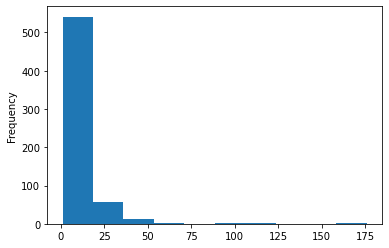

In [79]:
self.plot(kind='hist')

In [81]:
self_75= self[self > 15].index.to_list()

In [96]:
accre_jobs_failed_nodes_75 = accre_jobs_failed_nodesplit[accre_jobs_failed_nodesplit['node_numbers'].isin(self_75)]

In [98]:
accre_jobs_failed_nodes_75

,exitcode,failure,node_index,node_numbers
0,0:6,1,gpu,0048
2,0:15,1,gpu,0053
12,1:0,1,gpu,0021
14,0:9,1,gpu,0021
15,0:9,1,gpu,0021
...,...,...,...,...
7248,0:15,1,cn,1433
7249,0:15,1,cn,1433
7250,0:15,1,cn,1433
7251,1:0,1,cn,1433


In [92]:
number_of_failures = accre_jobs_failed_nodes_75['node_numbers'].value_counts()
number_of_failures

0035    176
0019    107
0047    105
0023     90
0013     67
0030     60
0014     55
0015     51
0020     50
0032     46
0021     44
0031     44
0017     42
0018     42
0016     41
0024     39
0029     39
0028     38
0027     38
0025     36
0007     35
320      34
0008     34
405      33
0026     32
0048     32
347      30
0012     30
427      30
1101     29
1284     28
0005     28
1449     28
410      27
403      26
1437     26
340      25
386      25
356      25
1377     25
1347     24
401      24
326      23
0034     23
393      22
338      22
374      22
398      22
372      22
1479     22
324      22
0001     22
322      21
1392     21
1273     21
1421     21
1530     21
311      21
1423     20
305      20
1231     20
1469     20
1533     20
328      20
1442     20
416      20
0033     20
1263     19
1335     19
468      19
0010     19
1433     19
407      19
431      19
1091     19
487      19
1267     18
408      18
313      18
1422     18
1279     18
1399     18
332      18
1430

In [95]:
failures_df = pd.DataFrame({'node_number':number_of_failures.index, 'total_failures':number_of_failures.values})
failures_df

,node_number,total_failures
0,0035,176
1,0019,107
2,0047,105
3,0023,90
4,0013,67
5,0030,60
6,0014,55
7,0015,51
8,0020,50
9,0032,46


# Jason --
    Question: 2   CMS Frequency of failure on particular nodes - user names: "cmslocal" and "cmspilot"

# Maggi -- 
    Question: 3 & 4   Calculation of % of actual memory used and mean % for each group